# Initialisation

In [186]:
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import numpy as np 
from numpy import ravel
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from scipy.stats import pearsonr
import joblib


# Ajout du Dataset

In [187]:
features = pd.read_csv('alt_acsincome_ca_features_85(1).csv')

In [188]:
labels = pd.read_csv('alt_acsincome_ca_labels_85.csv')

# Data visualisation

In [4]:
features.info(), labels.info(), features.head(), labels.head(),features.describe, labels.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166315 entries, 0 to 166314
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AGEP    166315 non-null  float64
 1   COW     166315 non-null  float64
 2   SCHL    166315 non-null  float64
 3   MAR     166315 non-null  float64
 4   OCCP    166315 non-null  float64
 5   POBP    166315 non-null  float64
 6   RELP    166315 non-null  float64
 7   WKHP    166315 non-null  float64
 8   SEX     166315 non-null  float64
 9   RAC1P   166315 non-null  float64
dtypes: float64(10)
memory usage: 12.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166315 entries, 0 to 166314
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   PINCP   166315 non-null  bool 
dtypes: bool(1)
memory usage: 162.5 KB


(None,
 None,
    AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P
 0  41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0
 1  77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0
 2  38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0
 3  30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0
 4  36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0,
    PINCP
 0   True
 1   True
 2  False
 3   True
 4  False,
 <bound method NDFrame.describe of         AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P
 0       41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0
 1       77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0
 2       38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0
 3       30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0
 4       36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0
 ...      ...  ...   ...  ...     ...    ...   ...   ...  ...    ...
 166310  25.0  1.0  20.

# Plot

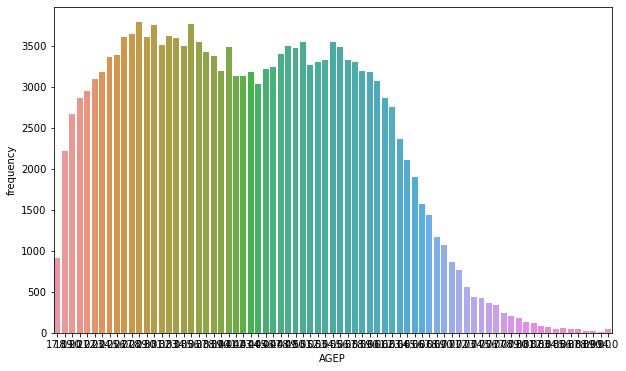

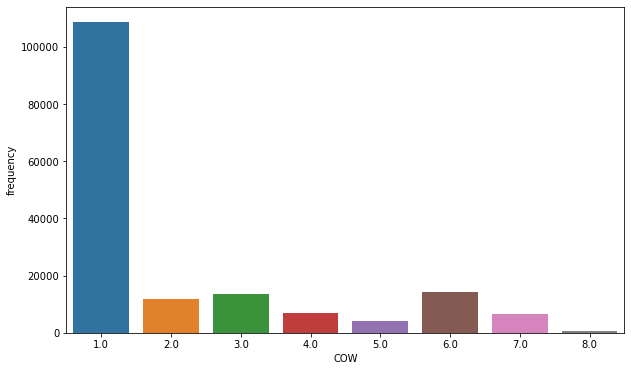

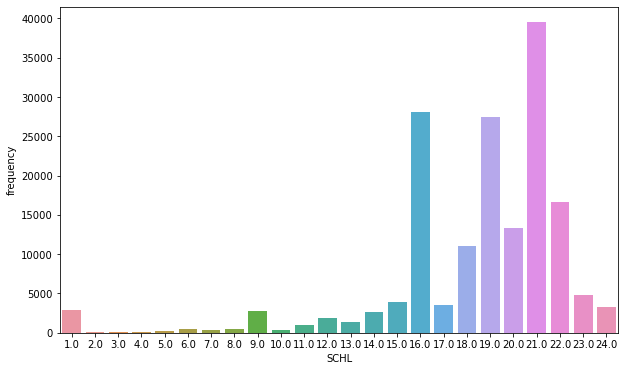

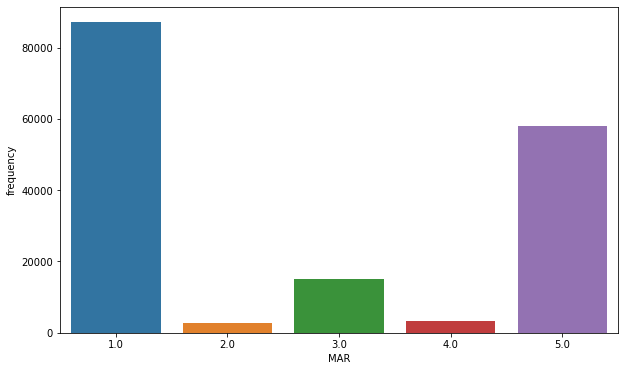

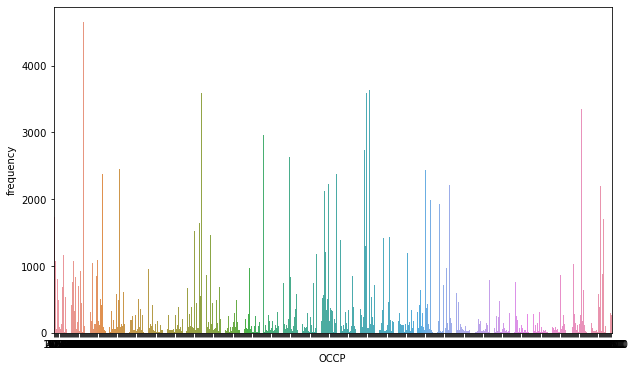

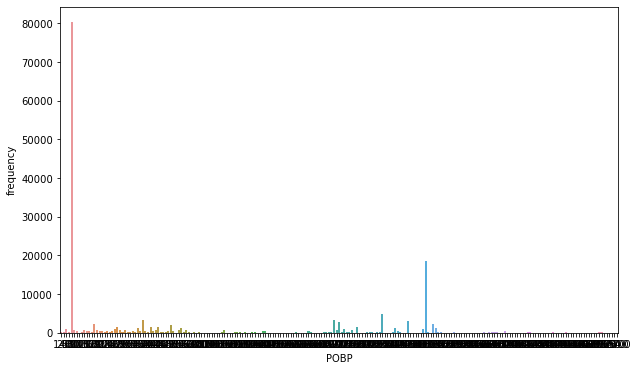

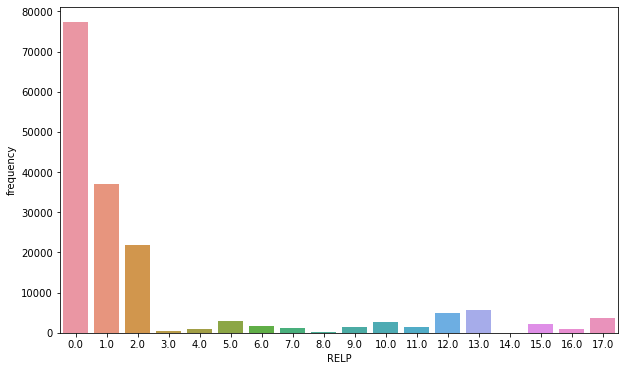

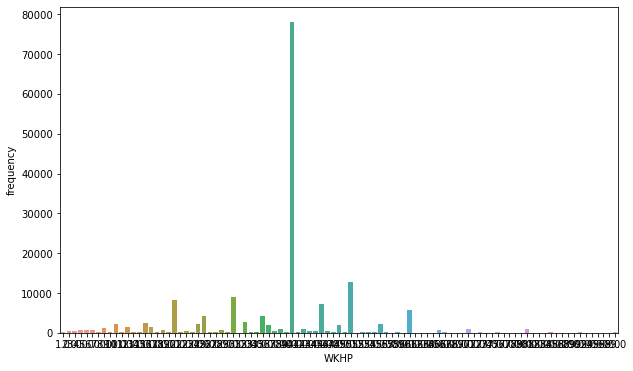

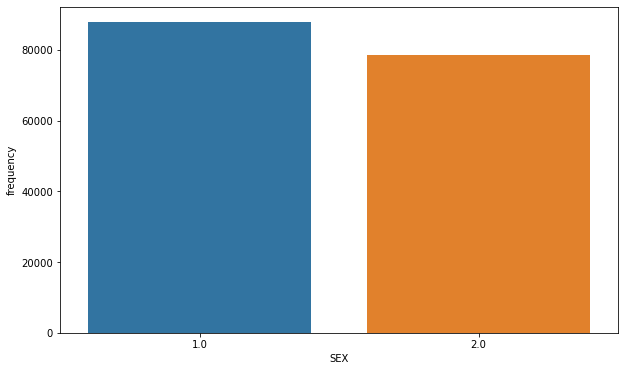

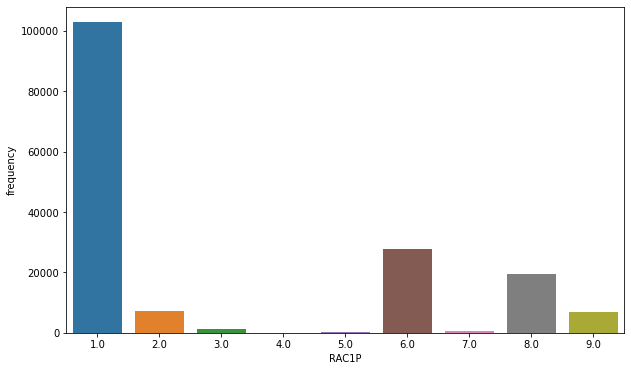

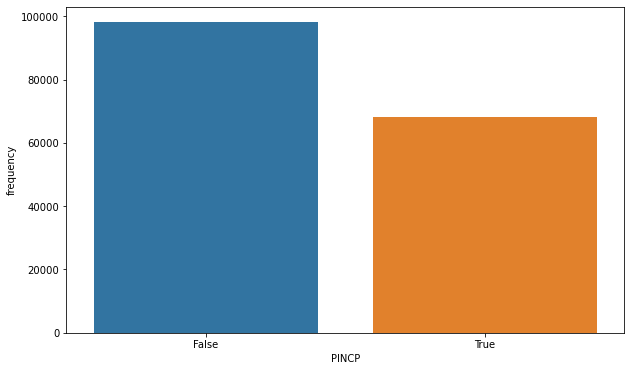

In [6]:
for y in features:
    plt.figure(figsize=(10,6))
    sb.countplot(x=y, data=features)
    plt.xlabel(y)
    plt.ylabel("frequency")
    plt.show()
for y in labels:
    plt.figure(figsize=(10,6))
    sb.countplot(x=y, data=labels)
    plt.xlabel(y)
    plt.ylabel("frequency")
    plt.show()


# Corrélation entre features

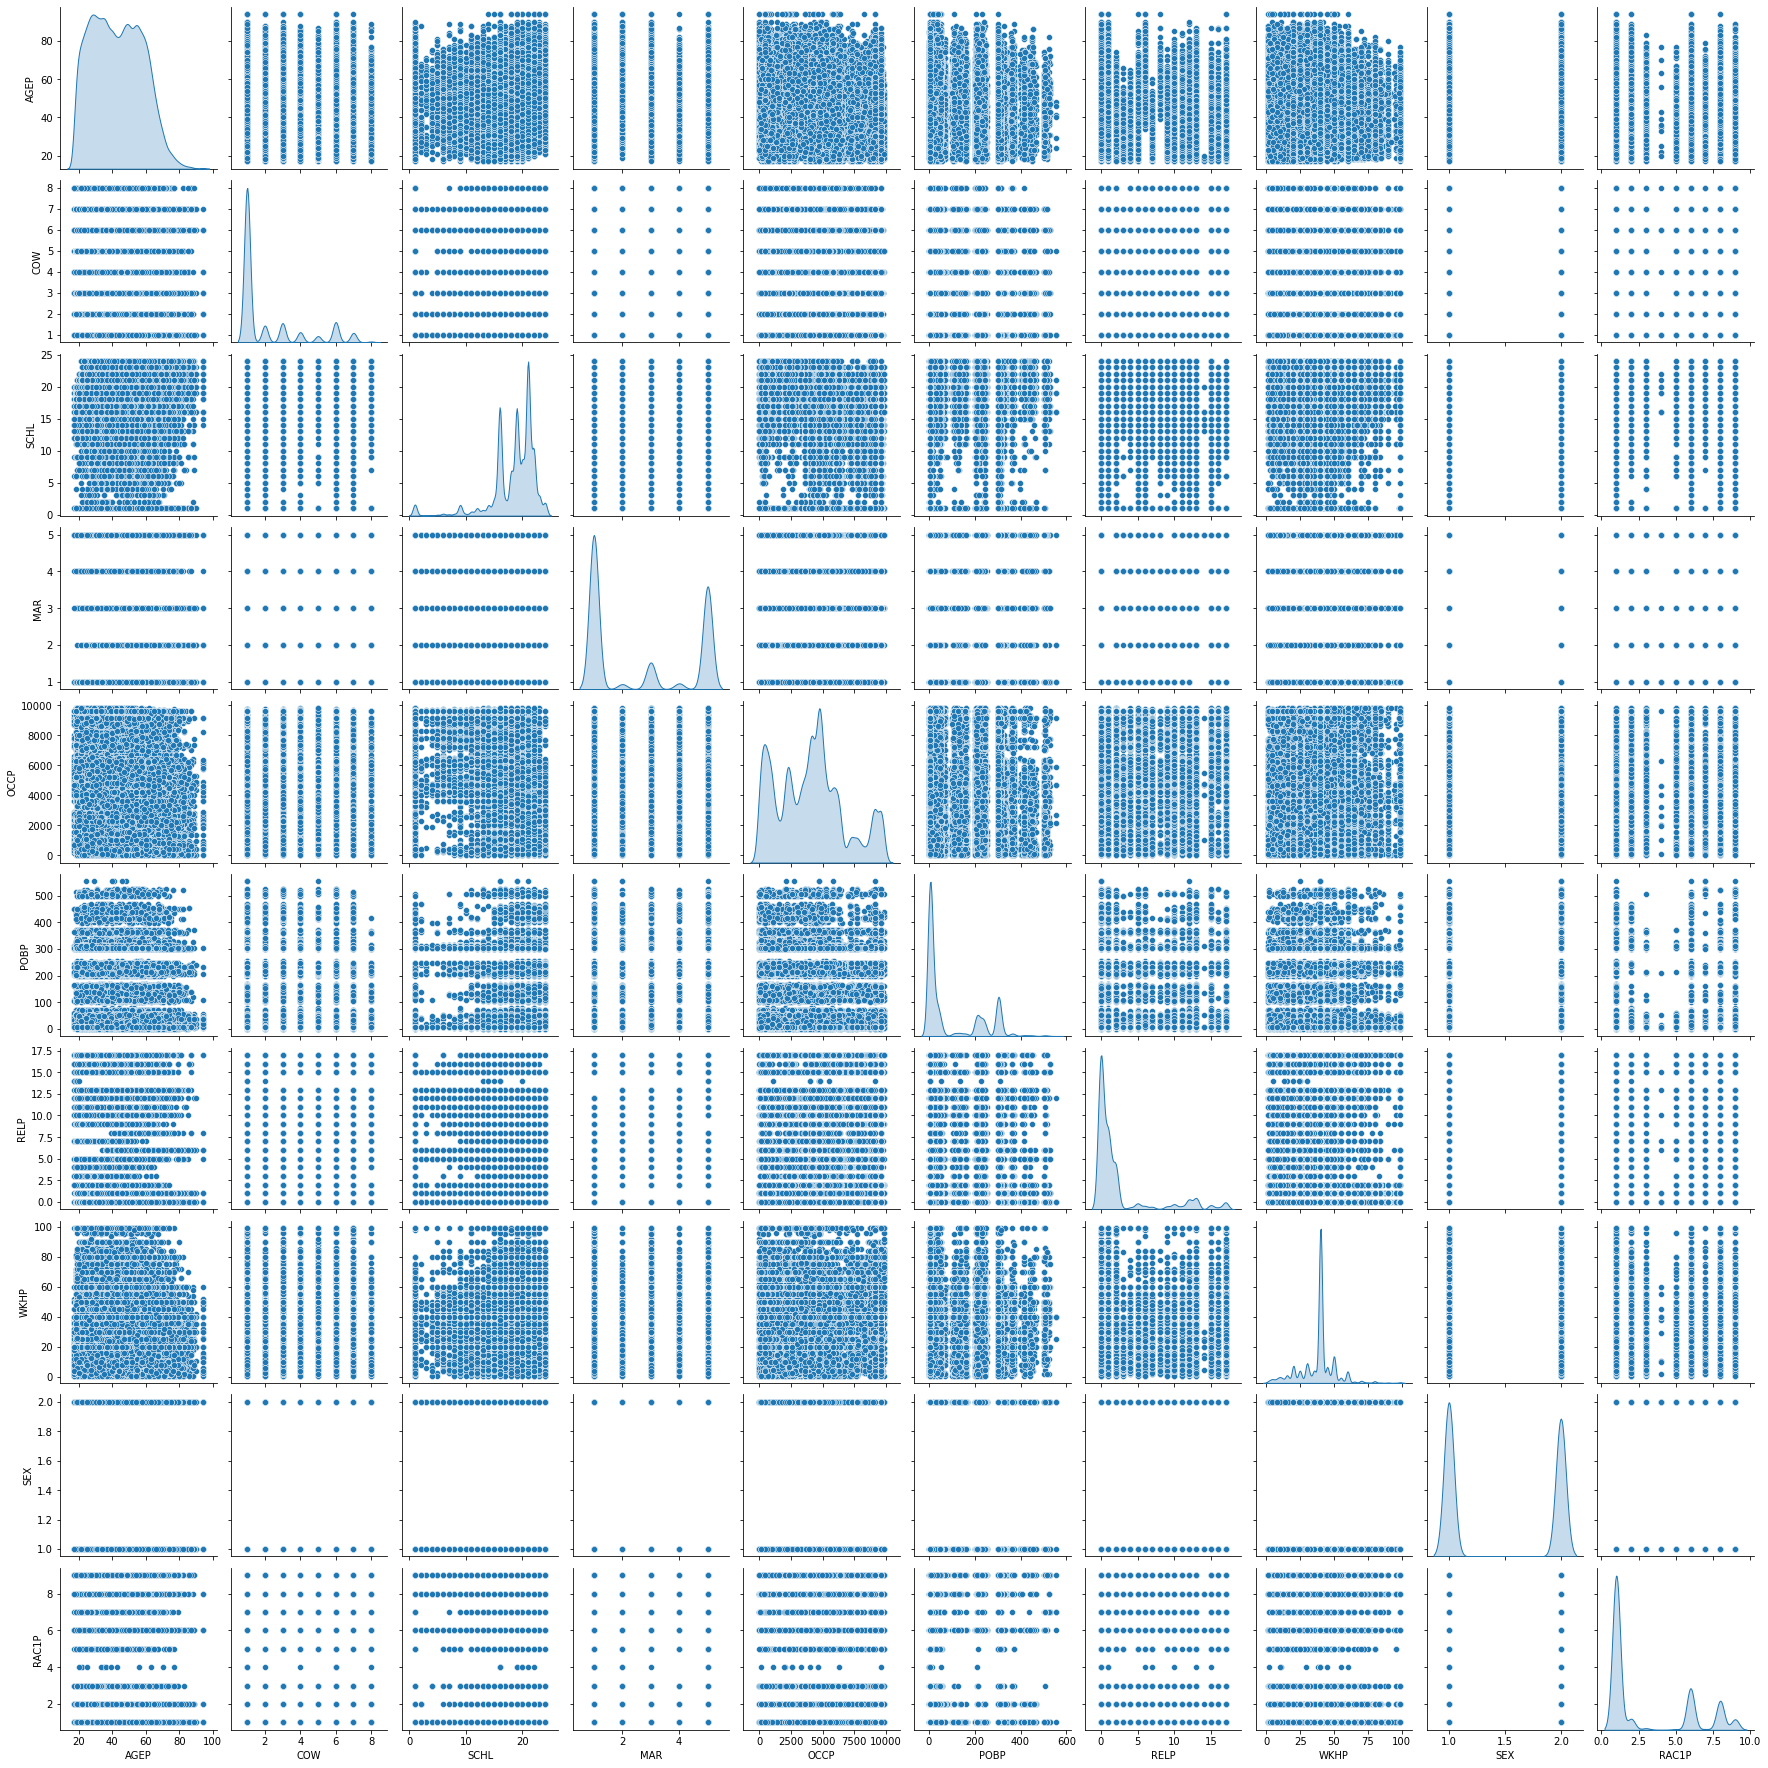

In [7]:
sb.pairplot(features, diag_kind="kde")

Text(0.5, 1.0, 'Correlation heatmap')

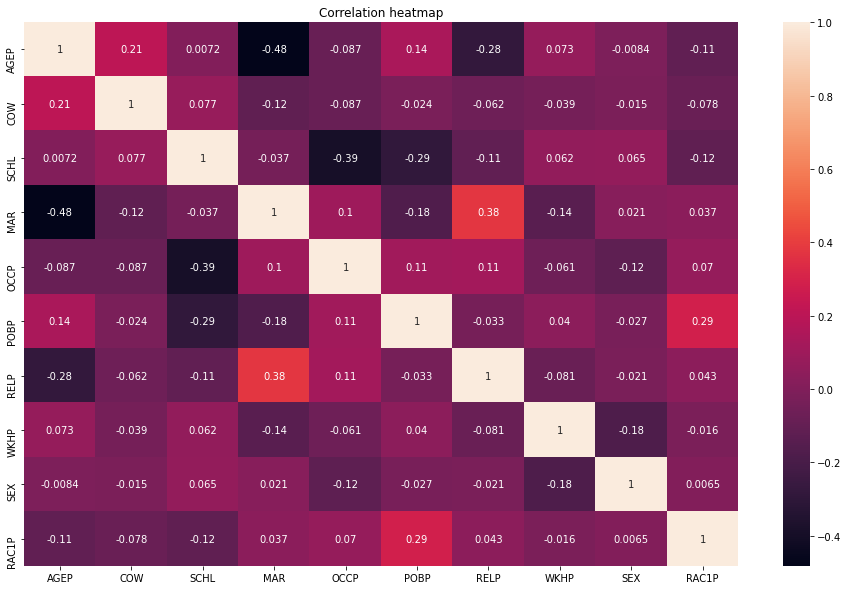

In [5]:
corr=features.corr()
plt.figure(figsize=(16,10))
sb.heatmap(corr, annot=True)
plt.title('Correlation heatmap')

# Shuffeling et Partitionner le jeu de données 

In [189]:
# Mélanger les indices
indices = shuffle(range(len(features)), random_state=1)
X_all = features.iloc[indices]
y_all = labels.iloc[indices]


num_samples = int(len(X_all) ) # * 0.1 si 10%
X, y = X_all.iloc[:num_samples], y_all.iloc[:num_samples]

# Subdivising

In [190]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de test :", len(X_test))


Taille de l'ensemble d'entraînement : 133052
Taille de l'ensemble de test : 33263


# Standardisation des données

In [191]:
scaler = StandardScaler()
numerics=['AGEP','COW','SCHL','MAR','OCCP','POBP','RELP','WKHP','RAC1P']

X_train[numerics] = scaler.fit_transform(X_train[numerics])
y_train = y_train.astype(int)

X_test[numerics] = scaler.transform(X_test[numerics])
y_test = y_test.astype(int)
joblib.dump(scaler,'scaler.joblib')

['scaler.joblib']

# Cross Validation

In [122]:
models = [
    ("Adaboost", AdaBoostClassifier()),
    ("GradientBoosting", GradientBoostingClassifier()),
    ("RandomForest", RandomForestClassifier())
]


for name, model in models:
    # Aplatir y_train
    y_train_flattened = ravel(y_train)
    
  
    scores = cross_val_score(model, X_train, y_train_flattened, cv=5)
    print(f"{name}: Mean Accuracy: {scores.mean()}, Standard Deviation: {scores.std()}")
    

Adaboost: Mean Accuracy: 0.8088040667644554, Standard Deviation: 0.0014074977310012736
GradientBoosting: Mean Accuracy: 0.8150722943050044, Standard Deviation: 0.0011362204906122865
RandomForest: Mean Accuracy: 0.8137043925869435, Standard Deviation: 0.0014234922846516687


# Evaluation

In [123]:
import time
models = [
    ("Adaboost", AdaBoostClassifier()),
    ("GradientBoosting", GradientBoostingClassifier()),
    ("RandomForest", RandomForestClassifier())
]
acc_av=[]
for name, model in models:
    y_train_flattened = ravel(y_train)
    
    a=time.time()
    model.fit(X_train, y_train_flattened)

    b=time.time()
    y_pred = model.predict(X_test)


    

    accuracy = accuracy_score(y_test, y_pred)
    acc_av.append(accuracy)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Evaluation results for {name}:")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("Temps d'execution:\n", b-a)
    print("\n" + "="*50 + "\n")  

Evaluation results for Adaboost:
Accuracy: 0.8091272585154676
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     19705
           1       0.77      0.76      0.76     13558

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263

Confusion Matrix:
 [[16629  3076]
 [ 3273 10285]]
Temps d'execution:
 4.2608702182769775


Evaluation results for GradientBoosting:
Accuracy: 0.8157412139614587
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85     19705
           1       0.78      0.77      0.77     13558

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263

Confusion Matrix:
 [[16749  2956]
 [ 3173 10385]]
Temps d'execution:
 15.38

## Stacking Model: Meta-modele

In [124]:
from sklearn.linear_model import LogisticRegression
train_predictions=[]
test_predictions=[]
for name, model in models:
    pred = model.predict_proba(X_train)
    train_predictions.append(pred)

    test_pred = model.predict_proba(X_test)
    test_predictions.append(test_pred)

stacked_train = np.hstack(train_predictions)
stacked_test = np.hstack(test_predictions)

meta_model = LogisticRegression(random_state=42, max_iter=500)
a=time.time()
meta_model.fit(stacked_train, y_train)
b=time.time()
stack_predictions = meta_model.predict(stacked_test)

# Évaluer la performance
stack_accuracy = accuracy_score(y_test, stack_predictions)
stack_report = classification_report(y_test, stack_predictions)
conf_matrix = confusion_matrix(y_test, stack_predictions)
acc_av.append(stack_accuracy)

print(f"Evaluation results for StackingModel:")
print(f"Accuracy of stacking model: {stack_accuracy}")
print("Classification Report:\n", stack_report)
print("Confusion Matrix:\n", conf_matrix)
print("Temps d'execution:\n", b-a)

c:\Users\mejri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation results for StackingModel:
Accuracy of stacking model: 0.810239605567748
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84     19705
           1       0.77      0.76      0.77     13558

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263

Confusion Matrix:
 [[16676  3029]
 [ 3283 10275]]
Temps d'execution:
 0.24135708808898926


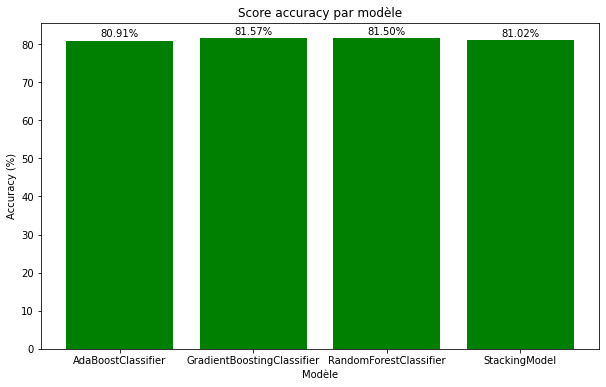

In [125]:
plt.figure(figsize=(10, 6))
mo = ['AdaBoostClassifier','GradientBoostingClassifier','RandomForestClassifier','StackingModel']

acc_av_percent = [round(acc * 100, 2) for acc in acc_av]
plt.bar(mo, acc_av_percent, color='green')

for i, value in enumerate(acc_av_percent):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

plt.title("Score accuracy par modèle")
plt.xlabel("Modèle")
plt.ylabel("Accuracy (%)")
plt.show()


# GridSearch

In [112]:
param_grid = {
    'Adaboost':{
        'n_estimators':[50,100,150,200],
        'learning_rate':[0.1,0.2,0.5],
    },
    'GradientBoosting':{
        'n_estimators':[100,200],
        'learning_rate':[0.1,0.2,0.5],
        'max_depth':[1,2,5],
    },
    'RandomForest': {
        'n_estimators': [50, 100 , 200],
        'criterion': ['gini'],
        'max_depth': [1,2,5,10],
        'min_samples_split':[2,5,10],
        'max_features':['sqrt','log2'],
    }
}   
models = [
    ("Adaboost", AdaBoostClassifier()),
    ("GradientBoosting", GradientBoostingClassifier()),
    ("RandomForest", RandomForestClassifier())
]

# Recherche des hyperparametres
for name, model in models:
    if name in param_grid:
        print(name)
        y_train_flattened = ravel(y_train)
        print(name)
        grid_search = GridSearchCV(model, param_grid[name], cv=5)
        print(name)
        grid_search.fit(X_train, y_train_flattened)
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation score: {grid_search.best_score_}")
        print("\n")


Adaboost
Adaboost
Adaboost
Best hyperparameters for Adaboost: {'learning_rate': 0.5, 'n_estimators': 200}
Best cross-validation score: 0.8125469581223183


GradientBoosting
GradientBoosting
GradientBoosting
Best hyperparameters for GradientBoosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.8271652940790112


RandomForest
RandomForest
RandomForest
Best hyperparameters for RandomForest: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.8144860496624922




# Best Hyperparameters 

In [126]:
import time
models = [
    ("Adaboost", AdaBoostClassifier(learning_rate = 0.5, n_estimators = 200)),
    ("GradientBoosting", GradientBoostingClassifier(learning_rate=0.2, n_estimators=200,max_depth=5)),
    ("RandomForest", RandomForestClassifier(max_depth=10, n_estimators=  200,criterion='gini',min_samples_split=2,max_features='log2'))
]
acc_apres=[]
for name, model in models:
    y_train_flattened = ravel(y_train)
    a=time.time()
    model.fit(X_train, y_train_flattened)

    b=time.time()
    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    acc_apres.append(accuracy)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Evaluation results for {name}:")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("Temps d'execution:\n", b-a)
    print("\n" + "="*50 + "\n")  
    joblib.dump(model, f"{name}_BestModel_{accuracy:.4f}".replace('.', '') + ".joblib")

Evaluation results for Adaboost:
Accuracy: 0.8132158855184439
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84     19705
           1       0.78      0.76      0.77     13558

    accuracy                           0.81     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.81      0.81      0.81     33263

Confusion Matrix:
 [[16703  3002]
 [ 3211 10347]]
Temps d'execution:
 16.622779607772827


Evaluation results for GradientBoosting:
Accuracy: 0.8279169046688513
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     19705
           1       0.79      0.79      0.79     13558

    accuracy                           0.83     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.83      0.83      0.83     33263

Confusion Matrix:
 [[16838  2867]
 [ 2857 10701]]
Temps d'execution:
 43.56

## Stacking Model: Meta_model


In [127]:
from joblib import load
model2=load("Adaboost_BestModel_08132.joblib")
model3=load("GradientBoosting_BestModel_08279.joblib")
model4=load("RandomForest_BestModel_08149.joblib")
ssss=load('scaler.joblib')
best_models=[model2,model3,model4]

In [128]:
from sklearn.linear_model import LogisticRegression
train_predictions=[]
test_predictions=[]
for model in best_models:
    pred = model.predict_proba(X_train)
    train_predictions.append(pred)

    test_pred = model.predict_proba(X_test)
    test_predictions.append(test_pred)

stacked_train = np.hstack(train_predictions)
stacked_test = np.hstack(test_predictions)

meta_model = LogisticRegression(random_state=42, max_iter=500)
a=time.time()
meta_model.fit(stacked_train, y_train)
b=time.time()
stack_predictions = meta_model.predict(stacked_test)

# Évaluer la performance
stack_accuracy = accuracy_score(y_test, stack_predictions)
stack_report = classification_report(y_test, stack_predictions)
conf_matrix = confusion_matrix(y_test, stack_predictions)
acc_apres.append(stack_accuracy)

print(f"Evaluation results for StackingModel:")
print(f"Accuracy of stacking model: {stack_accuracy}")
print("Classification Report:\n", stack_report)
print("Confusion Matrix:\n", conf_matrix)
print("Temps d'execution:\n", b-a)
joblib.dump(meta_model, f"Stacking_BestModel_{stack_accuracy:.4f}".replace('.', '') + ".joblib")

c:\Users\mejri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation results for StackingModel:
Accuracy of stacking model: 0.8274659531611701
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85     19705
           1       0.79      0.78      0.79     13558

    accuracy                           0.83     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.83      0.83      0.83     33263

Confusion Matrix:
 [[16916  2789]
 [ 2950 10608]]
Temps d'execution:
 0.19603753089904785


['Stacking_BestModel_08275.joblib']

# Comparaison

No handles with labels found to put in legend.


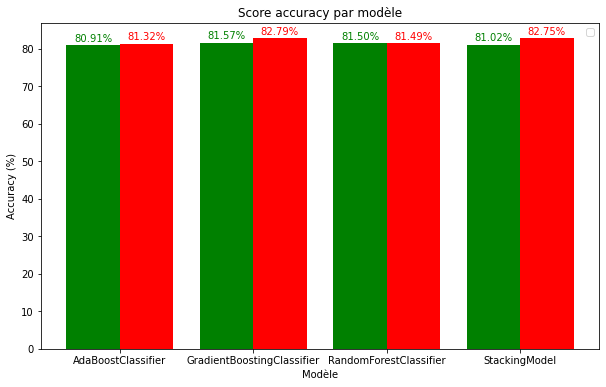

In [129]:
plt.figure(figsize=(10, 6))
mo = ['AdaBoostClassifier','GradientBoostingClassifier','RandomForestClassifier','StackingModel']

acc_av_percent = [round(acc * 100, 2) for acc in acc_av]
acc_apres_percent = [round(acc * 100, 2) for acc in acc_apres]

bar_width = 0.4
indices = np.arange(len(mo))

plt.bar(indices - bar_width / 2, acc_av_percent, width=bar_width, color='green')
plt.bar(indices + bar_width / 2, acc_apres_percent, width=bar_width, color='red')


for i, value in enumerate(acc_av_percent):
    plt.text(indices[i] - bar_width / 2, value + 0.5, f"{value:.2f}%", ha='center', va='bottom', fontsize=10, color='green')
for i, value in enumerate(acc_apres_percent):
    plt.text(indices[i] + bar_width / 2, value + 0.5, f"{value:.2f}%", ha='center', va='bottom', fontsize=10, color='red')

plt.title("Score accuracy par modèle")
plt.xlabel("Modèle")
plt.ylabel("Accuracy (%)")
plt.xticks(indices, mo)  
plt.legend()
plt.show()


# Valisation croisée

In [16]:
models = [
    ("Adaboost", AdaBoostClassifier(learning_rate = 0.5, n_estimators = 200)),
    ("GradientBoosting", GradientBoostingClassifier(learning_rate=0.2, n_estimators=200,max_depth=5)),
    ("RandomForest", RandomForestClassifier(max_depth=10, n_estimators=  200,criterion='gini',min_samples_split=2,max_features='log2'))
]

for name, model in models:
    y_train_flattened = ravel(y_train)
   
    scores = cross_val_score(model, X_train, y_train_flattened, cv=5)
    print(f"{name}: Mean Accuracy: {round(scores.mean()*100,2)}, Standard Deviation: {round(scores.std()*100,2)}")



Adaboost: Mean Accuracy: 81.25, Standard Deviation: 0.1
GradientBoosting: Mean Accuracy: 82.71, Standard Deviation: 0.22
RandomForest: Mean Accuracy: 81.41, Standard Deviation: 0.16


# Test des models sur autres datasets

In [132]:
nevada_features = pd.read_csv('acsincome_ne_features.csv')
nevada_labels = pd.read_csv('acsincome_ne_labelTP2.csv')

colorado_features = pd.read_csv('acsincome_co_features.csv')
colorado_labels =pd.read_csv('acsincome_co_label.csv')

In [133]:
# Mélanger les indices
indices_co = shuffle(range(len(colorado_features)))
indices_ne = shuffle(range(len(nevada_features)), random_state=1)

X_all_co = colorado_features.iloc[indices_co]
y_all_co = colorado_labels.iloc[indices_co]

X_all_ne = nevada_features.iloc[indices_ne]
y_all_ne = nevada_labels.iloc[indices_ne]

num_samples_co = int(len(X_all_co) )
num_samples_ne = int(len(X_all_ne) )
X_co, y_co = X_all_co.iloc[:num_samples_co], y_all_co.iloc[:num_samples_co]
X_ne, y_ne = X_all_ne.iloc[:num_samples_ne], y_all_ne.iloc[:num_samples_ne]

### Import des modeles entrainés

In [192]:
from joblib import load
model2=load("Adaboost_BestModel_08132.joblib")
model3=load("GradientBoosting_BestModel_08279.joblib")
model4=load("RandomForest_BestModel_08149.joblib")
stacks=load("Stacking_BestModel_08275.joblib")
ssss=load('scaler.joblib')
best_models=[model2,model3,model4]

## Nevada

In [135]:
##X_ne[numerics] = scaler.transform(X_ne[numerics])
X_ne_fit,y_ne_fit=X_ne,y_ne

X_ne_fit[numerics]=ssss.transform(X_ne_fit[numerics])
y_ne = y_ne.astype(int)

In [136]:
acc_nevada=[]
n=0
for model in best_models:    
    y_pred = model.predict(X_ne_fit)


    accuracy = accuracy_score(y_ne, y_pred)
    acc_nevada.append(accuracy)
    report = classification_report(y_ne, y_pred)
    conf_matrix = confusion_matrix(y_ne, y_pred)

    print(f"Evaluation results for {mo[n]}:")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n" + "="*50 + "\n")
    n+=1

Evaluation results for AdaBoostClassifier:
Accuracy: 0.7351877607788595
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78      7417
           1       0.55      0.83      0.66      3368

    accuracy                           0.74     10785
   macro avg       0.73      0.76      0.72     10785
weighted avg       0.79      0.74      0.74     10785

Confusion Matrix:
 [[5122 2295]
 [ 561 2807]]


Evaluation results for GradientBoostingClassifier:
Accuracy: 0.7499304589707928
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      7417
           1       0.57      0.85      0.68      3368

    accuracy                           0.75     10785
   macro avg       0.74      0.78      0.74     10785
weighted avg       0.81      0.75      0.76     10785

Confusion Matrix:
 [[5209 2208]
 [ 489 2879]]


Evaluation results for RandomForestClassifier:
Acc

### Stacking

In [137]:
test_predictions=[]
for model in best_models:    
    test_pred = model.predict_proba(X_ne_fit)
    test_predictions.append(test_pred)

stacked_test = np.hstack(test_predictions)

stack_predictions = stacks.predict(stacked_test)

# Évaluer la performance
stack_accuracy = accuracy_score(y_ne_fit, stack_predictions)
stack_report = classification_report(y_ne_fit, stack_predictions)
conf_matrix = confusion_matrix(y_ne_fit, stack_predictions)
acc_nevada.append(stack_accuracy)

print(f"Evaluation results for StackingModel:")
print(f"Accuracy of stacking model: {stack_accuracy}")
print("Classification Report:\n", stack_report)
print("Confusion Matrix:\n", conf_matrix)

Evaluation results for StackingModel:
Accuracy of stacking model: 0.7518776077885952
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      7417
           1       0.57      0.85      0.68      3368

    accuracy                           0.75     10785
   macro avg       0.74      0.78      0.74     10785
weighted avg       0.80      0.75      0.76     10785

Confusion Matrix:
 [[5248 2169]
 [ 507 2861]]


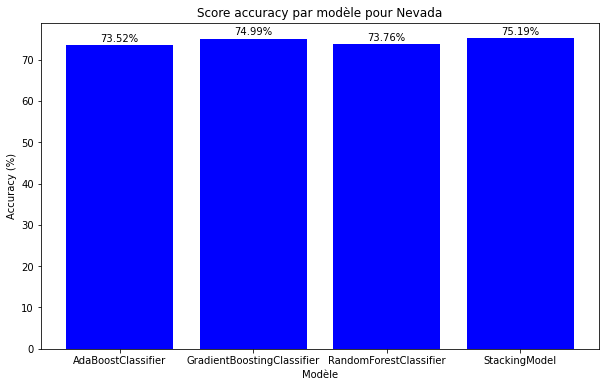

In [138]:
plt.figure(figsize=(10, 6))
mo = ['AdaBoostClassifier','GradientBoostingClassifier','RandomForestClassifier','StackingModel']

acc_nevada_percent = [round(acc * 100, 2) for acc in acc_nevada]
plt.bar(mo, acc_nevada_percent, color='blue')

for i, value in enumerate(acc_nevada_percent):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

plt.title("Score accuracy par modèle pour Nevada")
plt.xlabel("Modèle")
plt.ylabel("Accuracy (%)")
plt.show()


## Colorado

In [139]:
X_co_fit, y_co_fit=X_co, y_co
X_co_fit[numerics] = ssss.transform(X_co_fit[numerics])
y_co = y_co.astype(int)

In [140]:
acc_colorado=[]
n=0
for model in best_models:    
    y_pred = model.predict(X_co_fit)

    accuracy = accuracy_score(y_co, y_pred)
    acc_colorado.append(accuracy)
    report = classification_report(y_co, y_pred)
    conf_matrix = confusion_matrix(y_co, y_pred)

    print(f"Evaluation results for {mo[n]}:")
    n+=1
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n" + "="*50 + "\n")

Evaluation results for AdaBoostClassifier:
Accuracy: 0.7780617134095701
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79     18334
           1       0.69      0.84      0.76     12972

    accuracy                           0.78     31306
   macro avg       0.78      0.79      0.78     31306
weighted avg       0.79      0.78      0.78     31306

Confusion Matrix:
 [[13428  4906]
 [ 2042 10930]]


Evaluation results for GradientBoostingClassifier:
Accuracy: 0.7898805340829234
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80     18334
           1       0.70      0.86      0.77     12972

    accuracy                           0.79     31306
   macro avg       0.79      0.80      0.79     31306
weighted avg       0.81      0.79      0.79     31306

Confusion Matrix:
 [[13546  4788]
 [ 1790 11182]]


Evaluation results for RandomForestClassif

### Stacking

In [141]:
test_predictions=[]
for model in best_models:    
    test_pred = model.predict_proba(X_co_fit)
    test_predictions.append(test_pred)

stacked_test = np.hstack(test_predictions)

stack_predictions = stacks.predict(stacked_test)

# Évaluer la performance
stack_accuracy = accuracy_score(y_co_fit, stack_predictions)
stack_report = classification_report(y_co_fit, stack_predictions)
conf_matrix = confusion_matrix(y_co_fit, stack_predictions)
acc_colorado.append(stack_accuracy)

print(f"Evaluation results for StackingModel:")
print(f"Accuracy of stacking model: {stack_accuracy}")
print("Classification Report:\n", stack_report)
print("Confusion Matrix:\n", conf_matrix)

Evaluation results for StackingModel:
Accuracy of stacking model: 0.7912860154602952
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.81     18334
           1       0.70      0.86      0.77     12972

    accuracy                           0.79     31306
   macro avg       0.79      0.80      0.79     31306
weighted avg       0.81      0.79      0.79     31306

Confusion Matrix:
 [[13654  4680]
 [ 1854 11118]]


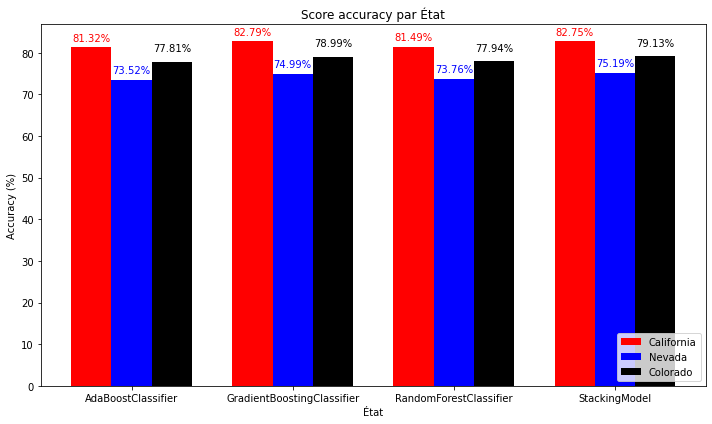

In [142]:
plt.figure(figsize=(10, 6))

acc_apres_percent = [round(acc * 100, 2) for acc in acc_apres]
acc_nevada_percent = [round(acc * 100, 2) for acc in acc_nevada]
acc_colorado_percent = [round(acc * 100, 2) for acc in acc_colorado]

bar_width = 0.25

indices = np.arange(len(mo))

plt.bar(indices - bar_width , acc_apres_percent, width=bar_width, color='red',label='California')
plt.bar(indices , acc_nevada_percent, width=bar_width, color='blue',label='Nevada')
plt.bar(indices + bar_width , acc_colorado_percent, width=bar_width, color='black',label='Colorado')

for i, value in enumerate(acc_apres_percent):
    plt.text(indices[i] - bar_width , value + 1, f"{value:.2f}%", ha='center', va='bottom', fontsize=10, color='red')
for i, value in enumerate(acc_nevada_percent):
    plt.text(indices[i] , value + 1, f"{value:.2f}%", ha='center', va='bottom', fontsize=10, color='blue')
for i, value in enumerate(acc_colorado_percent):
    plt.text(indices[i] + bar_width , value + 2, f"{value:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

plt.title("Score accuracy par État")
plt.xlabel("État")
plt.ylabel("Accuracy (%)")
plt.xticks(indices, mo)  
plt.legend(loc="lower right") 
plt.tight_layout()
plt.show()


# 4. Equité

# Bonus: Shap

### RandomForest

In [ ]:
import shap

SystemError: initialization of _internal failed without raising an exception

In [184]:
explainer = shap.TreeExplainer(model4)
explanation=explainer(X_test)
shap_values = explanation.values

NameError: name 'shap' is not defined

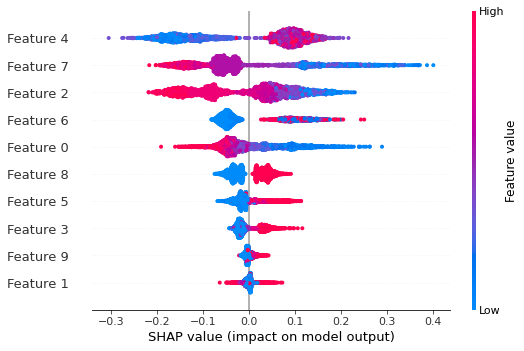

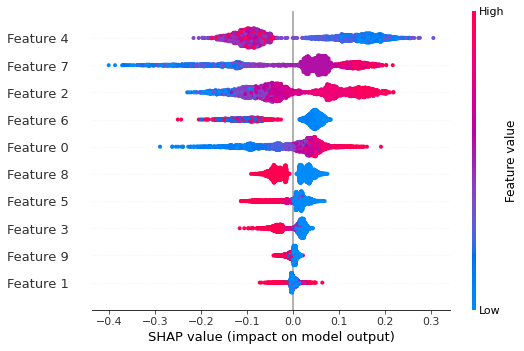

In [121]:
for class_index in range(2):
    shap_values_single_class = explanation[:, :, class_index]
    shap.plots.beeswarm(shap_values_single_class)

### GradientBoost

In [48]:
explainer = shap.TreeExplainer(model3)
explanation=explainer(X_test)
shap_values = explanation.values

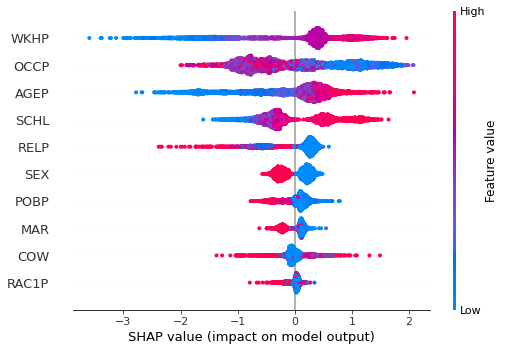

In [54]:

    ##shap_values_single_class = explanation[:, :, class_index]
shap.plots.beeswarm(explanation)

# Calcul de correlation 

In [143]:
noms_features = X.columns.tolist()
corr_coef = []
X_test = pd.DataFrame(X_test, columns=noms_features)
y_train_flat = np.ravel(y_test)
for feat in noms_features:
    correlation_coefficient = pearsonr(X_test[feat], y_train_flat)
    corr_coef.append(correlation_coefficient)
    print(feat + " : " + str(correlation_coefficient))

AGEP : PearsonRResult(statistic=0.2656844999163617, pvalue=0.0)
COW : PearsonRResult(statistic=0.04987436872025718, pvalue=8.9106863892193e-20)
SCHL : PearsonRResult(statistic=0.35084179185855735, pvalue=0.0)
MAR : PearsonRResult(statistic=-0.2696529916497584, pvalue=0.0)
OCCP : PearsonRResult(statistic=-0.3443212012548947, pvalue=0.0)
POBP : PearsonRResult(statistic=-0.09457974505044879, pvalue=5.8222588110188704e-67)
RELP : PearsonRResult(statistic=-0.22771882839052798, pvalue=0.0)
WKHP : PearsonRResult(statistic=0.33825275412297917, pvalue=0.0)
SEX : PearsonRResult(statistic=-0.11198033201351397, pvalue=2.821746882290791e-93)
RAC1P : PearsonRResult(statistic=-0.10123867920667112, pvalue=1.6853798915183768e-76)


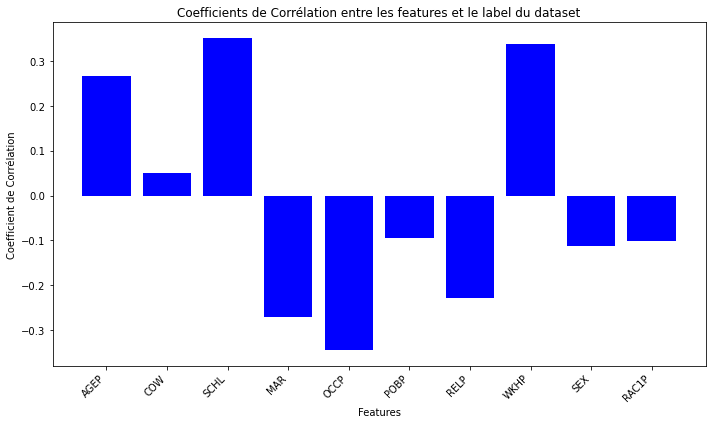

In [145]:
corr_coef_clean = [coeff[0] for coeff in corr_coef]

plt.figure(figsize=(10, 6))
plt.bar(noms_features, corr_coef_clean, color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient de Corrélation')
plt.title('Coefficients de Corrélation entre les features et le label du dataset')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()


plt.show()

# Corrélation de model

In [146]:
n=0
mo=["AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","StackingModel"]
for model in best_models:
    name=mo[n]
    if name == "AdaBoostClassifier":
        y_pred_Adaboost = model.predict(X_test)
        print("je suis la")
    if name == "GradientBoostingClassifier":
        y_pred_GradientBoosting = model.predict(X_test)
    if name == "RandomForestClassifier":
        y_pred_RandomForest = model.predict(X_test)
    n+=1
    


je suis la


In [147]:
test_predictions=[]
for model in best_models:    
    test_pred = model.predict_proba(X_test)
    test_predictions.append(test_pred)

stacked_test = np.hstack(test_predictions)

stack_predictions = stacks.predict(stacked_test)

In [148]:
noms_features = features.columns.tolist()
y_list = [y_pred_Adaboost, y_pred_GradientBoosting, y_pred_RandomForest,stack_predictions]
n = 1
SVM_corr = []
Adaboost_corr = []
GradientBoosting_corr = []
RandomForest_corr = []
Stack_corr=[]
for y in y_list:
    for feat in noms_features:
        correlation_coefficient = pearsonr(X_test[feat], y)
        print(feat + " : " + str(correlation_coefficient))
        if n == 0:
            ##SVM_corr.append(correlation_coefficient)
            print("non")
        if n == 1:
            Adaboost_corr.append(correlation_coefficient)
        if n == 2:
            GradientBoosting_corr.append(correlation_coefficient)
        if n == 3:
            RandomForest_corr.append(correlation_coefficient)
        if n==4:
            Stack_corr.append(correlation_coefficient)
    print("\n")
    n +=1
Model_corr = [Adaboost_corr, GradientBoosting_corr, RandomForest_corr,Stack_corr]

AGEP : PearsonRResult(statistic=0.2938776953836696, pvalue=0.0)
COW : PearsonRResult(statistic=0.07584857661758594, pvalue=1.2232726505316673e-43)
SCHL : PearsonRResult(statistic=0.45865182996471865, pvalue=0.0)
MAR : PearsonRResult(statistic=-0.31505273163135017, pvalue=0.0)
OCCP : PearsonRResult(statistic=-0.46531135012026764, pvalue=0.0)
POBP : PearsonRResult(statistic=-0.13893514217273736, pvalue=5.223468214162905e-143)
RELP : PearsonRResult(statistic=-0.27967775072905104, pvalue=0.0)
WKHP : PearsonRResult(statistic=0.4153664298894393, pvalue=0.0)
SEX : PearsonRResult(statistic=-0.1453514389633075, pvalue=1.7873251286488822e-156)
RAC1P : PearsonRResult(statistic=-0.13666097185620318, pvalue=2.1850966365331424e-138)


AGEP : PearsonRResult(statistic=0.2992913616482242, pvalue=0.0)
COW : PearsonRResult(statistic=0.06493695666634208, pvalue=2.018407872054328e-32)
SCHL : PearsonRResult(statistic=0.4402926411145352, pvalue=0.0)
MAR : PearsonRResult(statistic=-0.3082681950108399, pvalue=

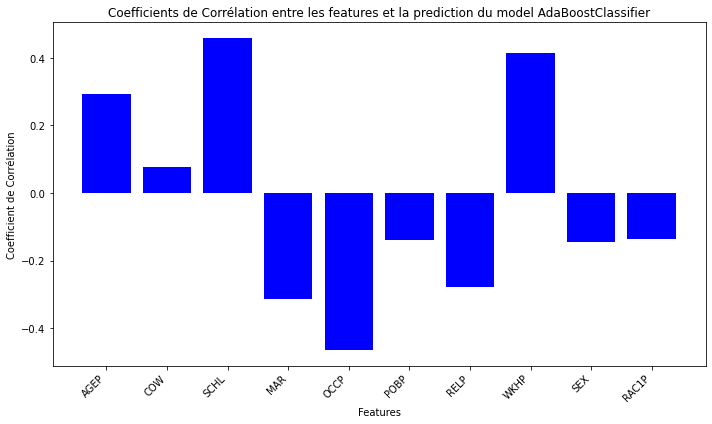

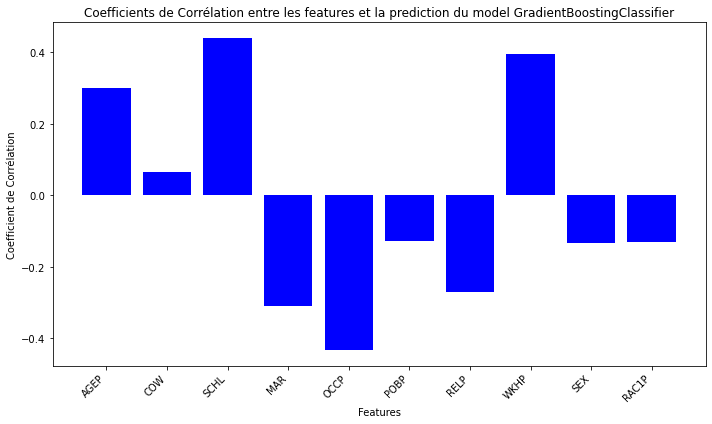

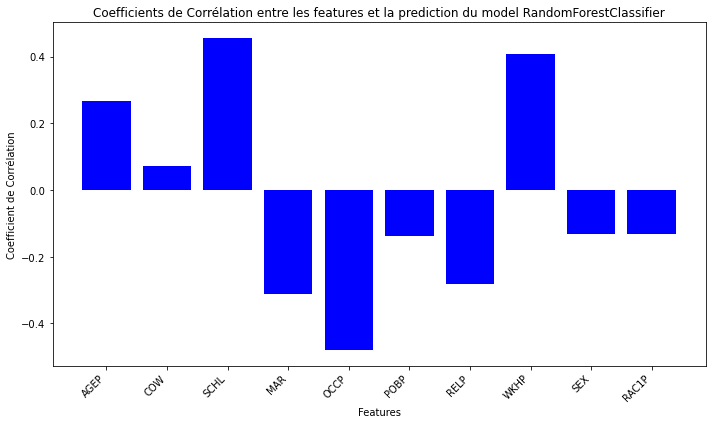

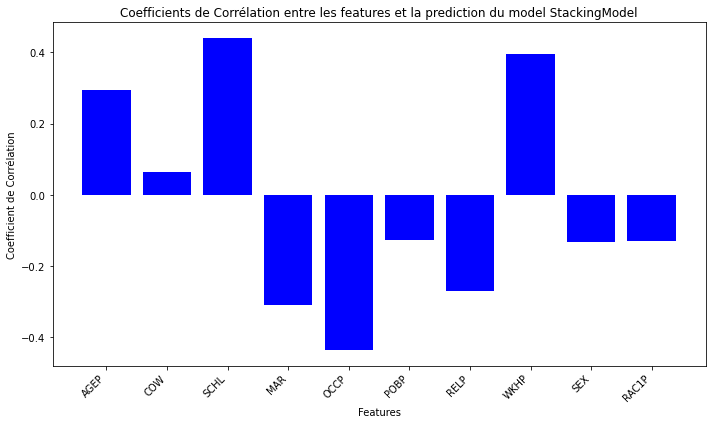

In [149]:
n = 0
for model in best_models:
    corr_values = [corr[0] for corr in Model_corr[n]]
    
    plt.figure(figsize=(10, 6))
    plt.bar(noms_features, corr_values, color='blue')
    plt.xlabel('Features')
    plt.ylabel('Coefficient de Corrélation')
    plt.title('Coefficients de Corrélation entre les features et la prediction du model ' + mo[n] )
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()

    
    plt.show()
    n += 1
corr_values = [corr[0] for corr in Model_corr[n]]
    
plt.figure(figsize=(10, 6))
plt.bar(noms_features, corr_values, color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient de Corrélation')
plt.title('Coefficients de Corrélation entre les features et la prediction du model ' + mo[n] )
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

    
plt.show()
n += 1

# Comparaison

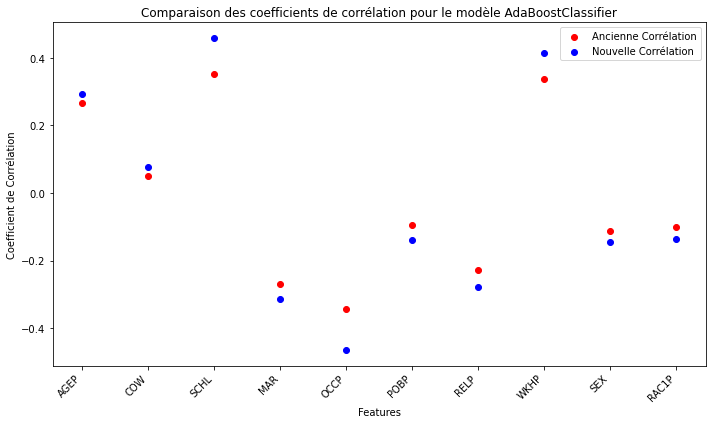

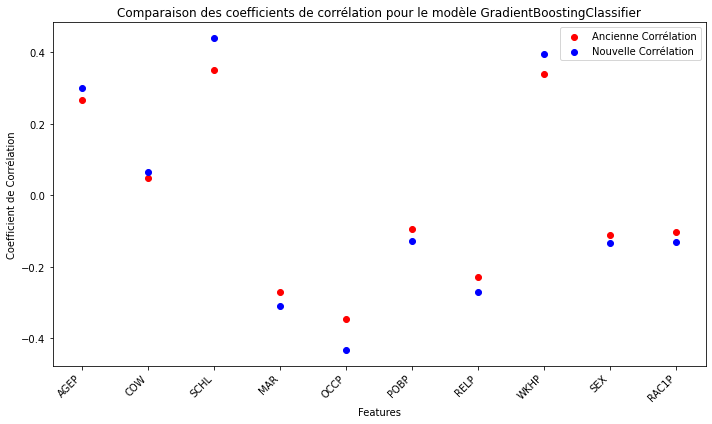

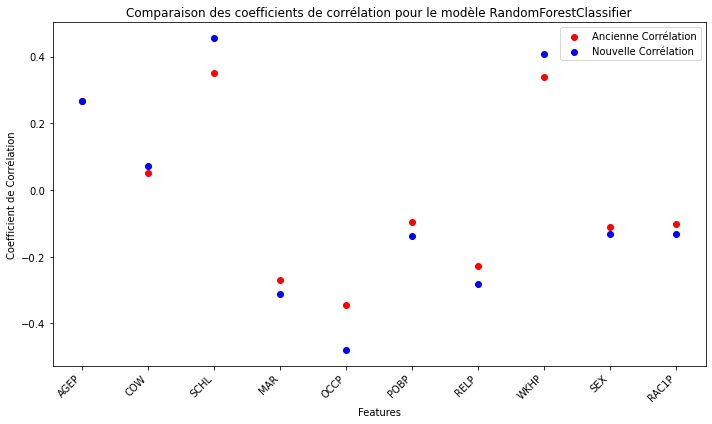

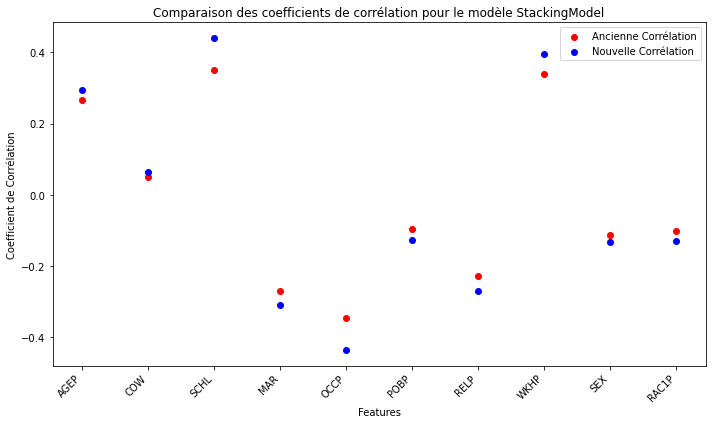

In [150]:

noms_features = features.columns.tolist()
n=0
for corr in Model_corr:
    corr_values = [m for (m,n) in corr]
    plt.figure(figsize=(10, 6))
    indices = np.arange(len(noms_features))  
    plt.scatter(indices, corr_coef_clean, color='red', label='Ancienne Corrélation', zorder=5)

    plt.scatter(indices, corr_values, color='blue', label='Nouvelle Corrélation', zorder=5)
    
    plt.xlabel('Features')
    plt.ylabel('Coefficient de Corrélation')
    plt.title(f'Comparaison des coefficients de corrélation pour le modèle {mo[n]}')
    plt.xticks(indices, noms_features, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
    n+=1


# Permutation_importance

In [193]:
n=0
for model in best_models:
    name=mo[n]
    n+=1
    print(n)
    if n==1 :
        result_Adaboost = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        print("ADAboost permut fini")
    if n==2:
        result_GradientBoosting = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        print("GradientBoostingClassifier permut fini")
    if n==3:
        result_RandomForest = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        print("RandomForestClassifier permut fini")


1
ADAboost permut fini
2
GradientBoostingClassifier permut fini
3
RandomForestClassifier permut fini


In [194]:
result_StackingModel = permutation_importance(stacks, stacked_test, y_test, n_repeats=10, random_state=42)
print("Meta-Model permut fini")

Meta-Model permut fini


In [203]:
result_StackingModel, len(result_GradientBoosting)

({'importances_mean': array([-2.10444037e-05, -2.10444037e-05,  9.36506028e-02,  9.12635661e-02,
         -3.33704116e-04, -3.30697772e-04]),
  'importances_std': array([5.55156941e-05, 5.55156941e-05, 1.54816176e-03, 1.67677707e-03,
         1.79602285e-04, 1.70064464e-04]),
  'importances': array([[-3.00634338e-05,  6.01268677e-05,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00, -6.01268677e-05,
          -1.20253735e-04, -3.00634338e-05, -9.01903015e-05,
           6.01268677e-05],
         [-3.00634338e-05,  6.01268677e-05,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00, -6.01268677e-05,
          -1.20253735e-04, -3.00634338e-05, -9.01903015e-05,
           6.01268677e-05],
         [ 9.26855665e-02,  9.61127980e-02,  9.34371524e-02,
           9.38881039e-02,  9.15431561e-02,  9.21744882e-02,
           9.34672158e-02,  9.57821002e-02,  9.53912756e-02,
           9.20241710e-02],
         [ 8.97994769e-02,  9.40985479e-02,  9.12725852e-02,
           9.1

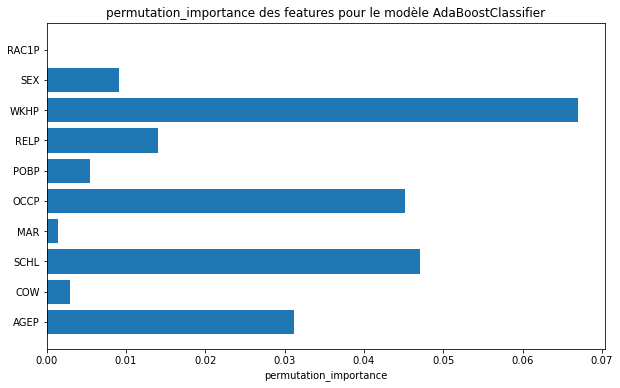

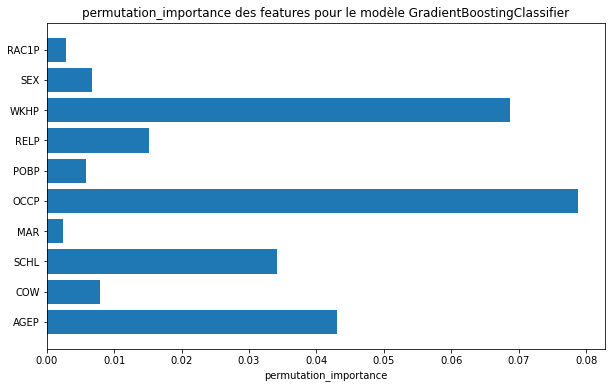

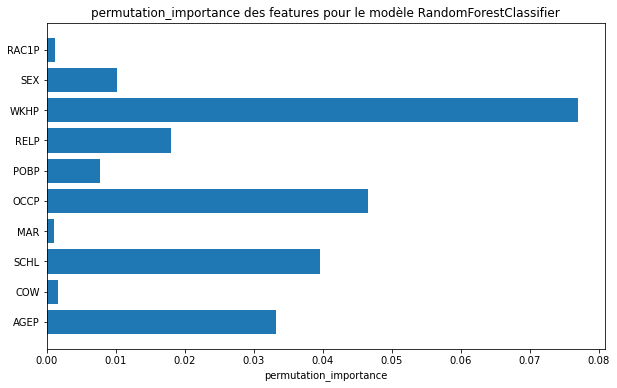

In [197]:
result_list = [result_Adaboost, result_GradientBoosting, result_RandomForest]
result_list[0]['importances_mean']

feature_names = features.columns
for idx, result in enumerate(result_list):
    importance_means = result['importances_mean']

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(importance_means)), importance_means, align='center')
    plt.yticks(range(len(importance_means)), feature_names)
    plt.xlabel('permutation_importance')
    plt.title(f'permutation_importance des features pour le modèle {mo[idx]}')
    plt.show()

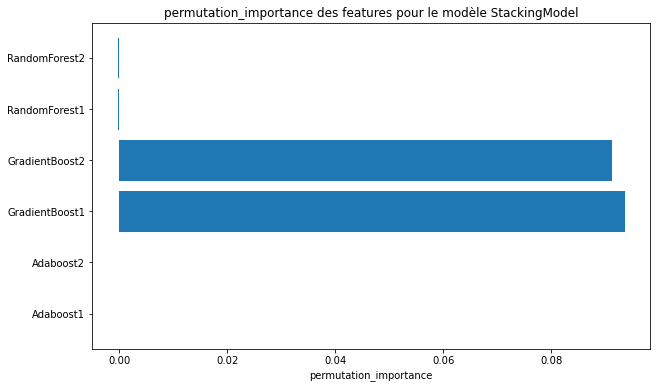

In [212]:
result_list = [result_StackingModel]

feature_labels=["Adaboost1","Adaboost2","GradientBoost1","GradientBoost2","RandomForest1","RandomForest2"]
for idx, result in enumerate(result_list):
    importance_means = result['importances_mean']

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(importance_means)), importance_means, align='center')
    plt.yticks(range(len(importance_means)), feature_labels)
    plt.xlabel('permutation_importance')
    plt.title(f'permutation_importance des features pour le modèle StackingModel')
    plt.show()


# Matrice de confusion de la feature 'SEX' pour les différents modèles

## % True dans X_train

In [156]:
dataset1=pd.concat([X_train,y_train],axis=1)

In [157]:
len(dataset1[dataset1["PINCP"]==True])/len(X_train)

0.4107040856206596

## % Homme True dans X_train

In [158]:
Homme=dataset1[dataset1["SEX"]==1]
Homme_T=Homme[Homme["PINCP"]==True]


In [159]:
len(Homme_T)/len(Homme)

0.4667719942496833

## % Femme True dans X_train


In [160]:
Femme=dataset1[dataset1["SEX"]==2]
Femme_T=Femme[Femme["PINCP"]==True]

In [161]:
len(Femme_T)/len(Femme)

0.34797356477426544

## Matrice de confusion Avec la feature "SEX"

In [162]:
from joblib import load
model2=load("Adaboost_BestModel_08132.joblib")
model3=load("GradientBoosting_BestModel_08279.joblib")
model4=load("RandomForest_BestModel_08149.joblib")
ssss=load('scaler.joblib')
models=[model2,model3,model4]

In [163]:
feature = 'SEX'
X_test222=pd.DataFrame(X_test)

X_test222.columns=X.columns.tolist()

diff_valeur = [1.0 , 2.0] 
True_positive = {}
True_negative = {}
False_positive = {}
False_negative = {}
n=0

pairs,impairs=[],[]
test_predictions=[]
for model in best_models:
    for i in diff_valeur:       
        y_pred = model.predict(X_test)
        
        test_pred = model.predict_proba(X_test)
        if (i==1.0):
            pairs.append(test_pred)
        else:
            impairs.append(test_pred)

        mask = ((X_test222[feature]) == i)
        conf_matrix = confusion_matrix(y_test[mask], y_pred[mask])
        tn, fp, fn, tp = conf_matrix.ravel()
        key = f"{i}_{mo[n]}"
        True_positive[key] = tp
        True_negative[key] = tn
        False_positive[key] = fp
        False_negative[key] = fn
        
        
        # print(f"Confusion matrix for {feature} using {name} for value of {int(i)}:")
        # print(conf_matrix)
        # print("\n" + "="*50 + "\n")
    n+=1
pairs = np.hstack(pairs)


impairs = np.hstack(impairs)


for i in diff_valeur:       
    if (i == 1.0):
        y_pred = stacks.predict(pairs)
        print("indice 0")
    else:
        y_pred = stacks.predict(impairs)
    
    mask = ((X_test222[feature]) == i)
    conf_matrix = confusion_matrix(y_test[mask], y_pred[mask])
    tn, fp, fn, tp = conf_matrix.ravel()
    key = f"{i}_{mo[n]}"
    True_positive[key] = tp
    True_negative[key] = tn
    False_positive[key] = fp
    False_negative[key] = fn
print("TP : ")
print(True_positive)
print("TN : ")
print(True_negative)
print("FP : ")
print(False_positive)
print("FN : ")
print(False_negative)


Taux_TP = {}
Taux_TN = {}
for k in True_positive.keys():
    Taux_TP[k] = True_positive[k]/(True_positive[k]+False_negative[k])
    Taux_TN[k] = True_negative[k]/(True_negative[k]+False_positive[k])


print("\n")


results_df = pd.DataFrame({
    'Model_Feature': Taux_TP.keys(),
    'Sensibilité : True Positive Rate (TPR)': Taux_TP.values(),
    'Spécificité ; True Negative Rate (TNR)': Taux_TN.values()
})
print("\nRésumé des métriques :")
results_df

indice 0
TP : 
{'1.0_AdaBoostClassifier': 6455, '2.0_AdaBoostClassifier': 3892, '1.0_GradientBoostingClassifier': 6576, '2.0_GradientBoostingClassifier': 4125, '1.0_RandomForestClassifier': 6382, '2.0_RandomForestClassifier': 3941, '1.0_StackingModel': 6533, '2.0_StackingModel': 4075}
TN : 
{'1.0_AdaBoostClassifier': 7714, '2.0_AdaBoostClassifier': 8989, '1.0_GradientBoostingClassifier': 7828, '2.0_GradientBoostingClassifier': 9010, '1.0_RandomForestClassifier': 7816, '2.0_RandomForestClassifier': 8968, '1.0_StackingModel': 7871, '2.0_StackingModel': 9045}
FP : 
{'1.0_AdaBoostClassifier': 1776, '2.0_AdaBoostClassifier': 1226, '1.0_GradientBoostingClassifier': 1662, '2.0_GradientBoostingClassifier': 1205, '1.0_RandomForestClassifier': 1674, '2.0_RandomForestClassifier': 1247, '1.0_StackingModel': 1619, '2.0_StackingModel': 1170}
FN : 
{'1.0_AdaBoostClassifier': 1617, '2.0_AdaBoostClassifier': 1594, '1.0_GradientBoostingClassifier': 1496, '2.0_GradientBoostingClassifier': 1361, '1.0_Rand

,Model_Feature,Sensibilité : True Positive Rate (TPR),Spécificité ; True Negative Rate (TNR)
0,1.0_AdaBoostClassifier,0.799678,0.812856
1,2.0_AdaBoostClassifier,0.709442,0.879980
2,1.0_GradientBoostingClassifier,0.814668,0.824868
3,2.0_GradientBoostingClassifier,0.751914,0.882036
4,1.0_RandomForestClassifier,0.790634,0.823604
5,2.0_RandomForestClassifier,0.718374,0.877925
6,1.0_StackingModel,0.809341,0.829399
7,2.0_StackingModel,0.742800,0.885463


## Sans "SEX" + Refaire entrainement 

In [167]:
features = pd.read_csv('alt_acsincome_ca_features_85(1).csv')
labels = pd.read_csv('alt_acsincome_ca_labels_85.csv')
indices = shuffle(range(len(features)), random_state=1)

In [168]:
X = features.iloc[indices]
y = labels.iloc[indices]
sex_column=X["SEX"]
X=X.drop(columns="SEX")

In [169]:
X_train, X_test, y_train, y_test,sex_test,sex_train = train_test_split(
    X, y,sex_column, test_size=0.2, random_state=42)
print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de test :", len(X_test))

Taille de l'ensemble d'entraînement : 133052
Taille de l'ensemble de test : 33263


In [170]:
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
y_train = y_train.astype(int)

X_test= scaler.transform(X_test)
y_test = y_test.astype(int)

In [171]:
models1 = [
    ("Adaboost", AdaBoostClassifier(learning_rate = 0.5, n_estimators = 200)),
    ("GradientBoosting", GradientBoostingClassifier(learning_rate=0.2, n_estimators=200,max_depth=5)),
    ("RandomForest", RandomForestClassifier(max_depth=10, n_estimators=  200,criterion='gini',min_samples_split=2,max_features='log2'))
]

In [172]:
X_test222=pd.DataFrame(X_test)
X_test222.columns=X_test222.columns.tolist()


diff_valeur = [1.0 , 2.0]
True_positive = {}
True_negative = {}
False_positive = {}
False_negative = {}
train_predictions=[]
test_predictions=[]
n=0
pairs,impairs=[],[]
for name,model in models1:
    for i in diff_valeur:
        y_train_flattened = ravel(y_train)
        model.fit(X_train, y_train_flattened)
        y_pred = model.predict(X_test)
        
        pred = model.predict_proba(X_train)
        train_predictions.append(pred)

        test_pred = model.predict_proba(X_test)
        if (i==1.0):
            pairs.append(test_pred)
        else:
            impairs.append(test_pred)
        # Aligner les index de sex_test, y_test et y_pred
        y_test = y_test.reset_index(drop=True)
        sex_test = sex_test.reset_index(drop=True)
        y_pred = pd.Series(y_pred).reset_index(drop=True)

        
        mask = (sex_test == i)  
        conf_matrix = confusion_matrix(y_test[mask], y_pred[mask])
        tn, fp, fn, tp = conf_matrix.ravel()
        key = f"{i}_{mo[n]}"
        True_positive[key] = tp
        True_negative[key] = tn
        False_positive[key] = fp
        False_negative[key] = fn
        
        
        # print(f"Confusion matrix for {feature} using {name} for value of {int(i)}:")
        # print(conf_matrix)
        # print("\n" + "="*50 + "\n")
    n+=1
train_predictions = np.hstack(train_predictions)
pairs = np.hstack(pairs)


impairs = np.hstack(impairs)

meta_model.fit(train_predictions, y_train)  
for i in diff_valeur:    
    meta_model.fit(train_predictions, y_train)   
    if (i == 1.0):
        y_pred_stack = stacks.predict(pairs)
        print("indice 0")
    else:
        y_pred_stack = stacks.predict(impairs)
    y_pred_stack = pd.Series(y_pred_stack).reset_index(drop=True)
    mask = (sex_test == i) 
    conf_matrix = confusion_matrix(y_test[mask], y_pred_stack[mask])
    tn, fp, fn, tp = conf_matrix.ravel()
    key = f"{i}_{mo[n]}"
    True_positive[key] = tp
    True_negative[key] = tn
    False_positive[key] = fp
    False_negative[key] = fn
print("TP : ")
print(True_positive)
print("TN : ")
print(True_negative)
print("FP : ")
print(False_positive)
print("FN : ")
print(False_negative)


Taux_TP = {}
Taux_TN = {}
for k in True_positive.keys():
    Taux_TP[k] = True_positive[k]/(True_positive[k]+False_negative[k])
    Taux_TN[k] = True_negative[k]/(True_negative[k]+False_positive[k])

print("\n")

results_df = pd.DataFrame({
    'Model_Feature': Taux_TP.keys(),
    'Sensibilité : True Positive Rate (TPR)': Taux_TP.values(),
    'Spécificité :True Negative Rate (TNR)': Taux_TN.values()
})
print("\nRésumé des métriques :")
results_df

<ipython-input-172-3ad6d1fadccd>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conf_matrix = confusion_matrix(y_test[mask], y_pred[mask])
<ipython-input-172-3ad6d1fadccd>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conf_matrix = confusion_matrix(y_test[mask], y_pred[mask])
<ipython-input-172-3ad6d1fadccd>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conf_matrix = confusion_matrix(y_test[mask], y_pred[mask])
<ipython-input-172-3ad6d1fadccd>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conf_matrix = confusion_matrix(y_test[mask], y_pred[mask])
<ipython-input-172-3ad6d1fadccd>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conf_matrix = confusion_matrix(y_test[mask], y_pred[mask])
<ipython-input-172-3ad6d1fadccd>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conf_matrix = c

indice 0


<ipython-input-172-3ad6d1fadccd>:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conf_matrix = confusion_matrix(y_test[mask], y_pred_stack[mask])
c:\Users\mejri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TP : 
{'1.0_AdaBoostClassifier': 5451, '2.0_AdaBoostClassifier': 4856, '1.0_GradientBoostingClassifier': 5612, '2.0_GradientBoostingClassifier': 5057, '1.0_RandomForestClassifier': 5467, '2.0_RandomForestClassifier': 4894, '1.0_StackingModel': 5567, '2.0_StackingModel': 5011}
TN : 
{'1.0_AdaBoostClassifier': 8738, '2.0_AdaBoostClassifier': 7896, '1.0_GradientBoostingClassifier': 8835, '2.0_GradientBoostingClassifier': 8019, '1.0_RandomForestClassifier': 8731, '2.0_RandomForestClassifier': 7941, '1.0_StackingModel': 8886, '2.0_StackingModel': 8053}
FP : 
{'1.0_AdaBoostClassifier': 1584, '2.0_AdaBoostClassifier': 1487, '1.0_GradientBoostingClassifier': 1487, '2.0_GradientBoostingClassifier': 1364, '1.0_RandomForestClassifier': 1591, '2.0_RandomForestClassifier': 1442, '1.0_StackingModel': 1436, '2.0_StackingModel': 1330}
FN : 
{'1.0_AdaBoostClassifier': 1714, '2.0_AdaBoostClassifier': 1537, '1.0_GradientBoostingClassifier': 1553, '2.0_GradientBoostingClassifier': 1336, '1.0_RandomForestC

<ipython-input-172-3ad6d1fadccd>:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  conf_matrix = confusion_matrix(y_test[mask], y_pred_stack[mask])


,Model_Feature,Sensibilité : True Positive Rate (TPR),Spécificité :True Negative Rate (TNR)
0,1.0_AdaBoostClassifier,0.760782,0.846541
1,2.0_AdaBoostClassifier,0.759581,0.841522
2,1.0_GradientBoostingClassifier,0.783252,0.855939
3,2.0_GradientBoostingClassifier,0.791021,0.854631
4,1.0_RandomForestClassifier,0.763015,0.845863
5,2.0_RandomForestClassifier,0.765525,0.846318
6,1.0_StackingModel,0.776971,0.860880
7,2.0_StackingModel,0.783826,0.858254
